<a href="https://colab.research.google.com/github/C-Gabs/Portafolio/blob/main/BMW_Sales_Classification_(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Portafolio/Datos/BMW sales data (2010-2024) (1).csv')

data.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [3]:
# Añadimos una columna para el ingreso total de cada venta
data['total_price_USD'] = data['Price_USD']*data['Sales_Volume']
data.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,total_price_USD
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,819542000
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,271562732
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,792175410
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,246749637
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,153685840


# Analisis de Distribución de Clases

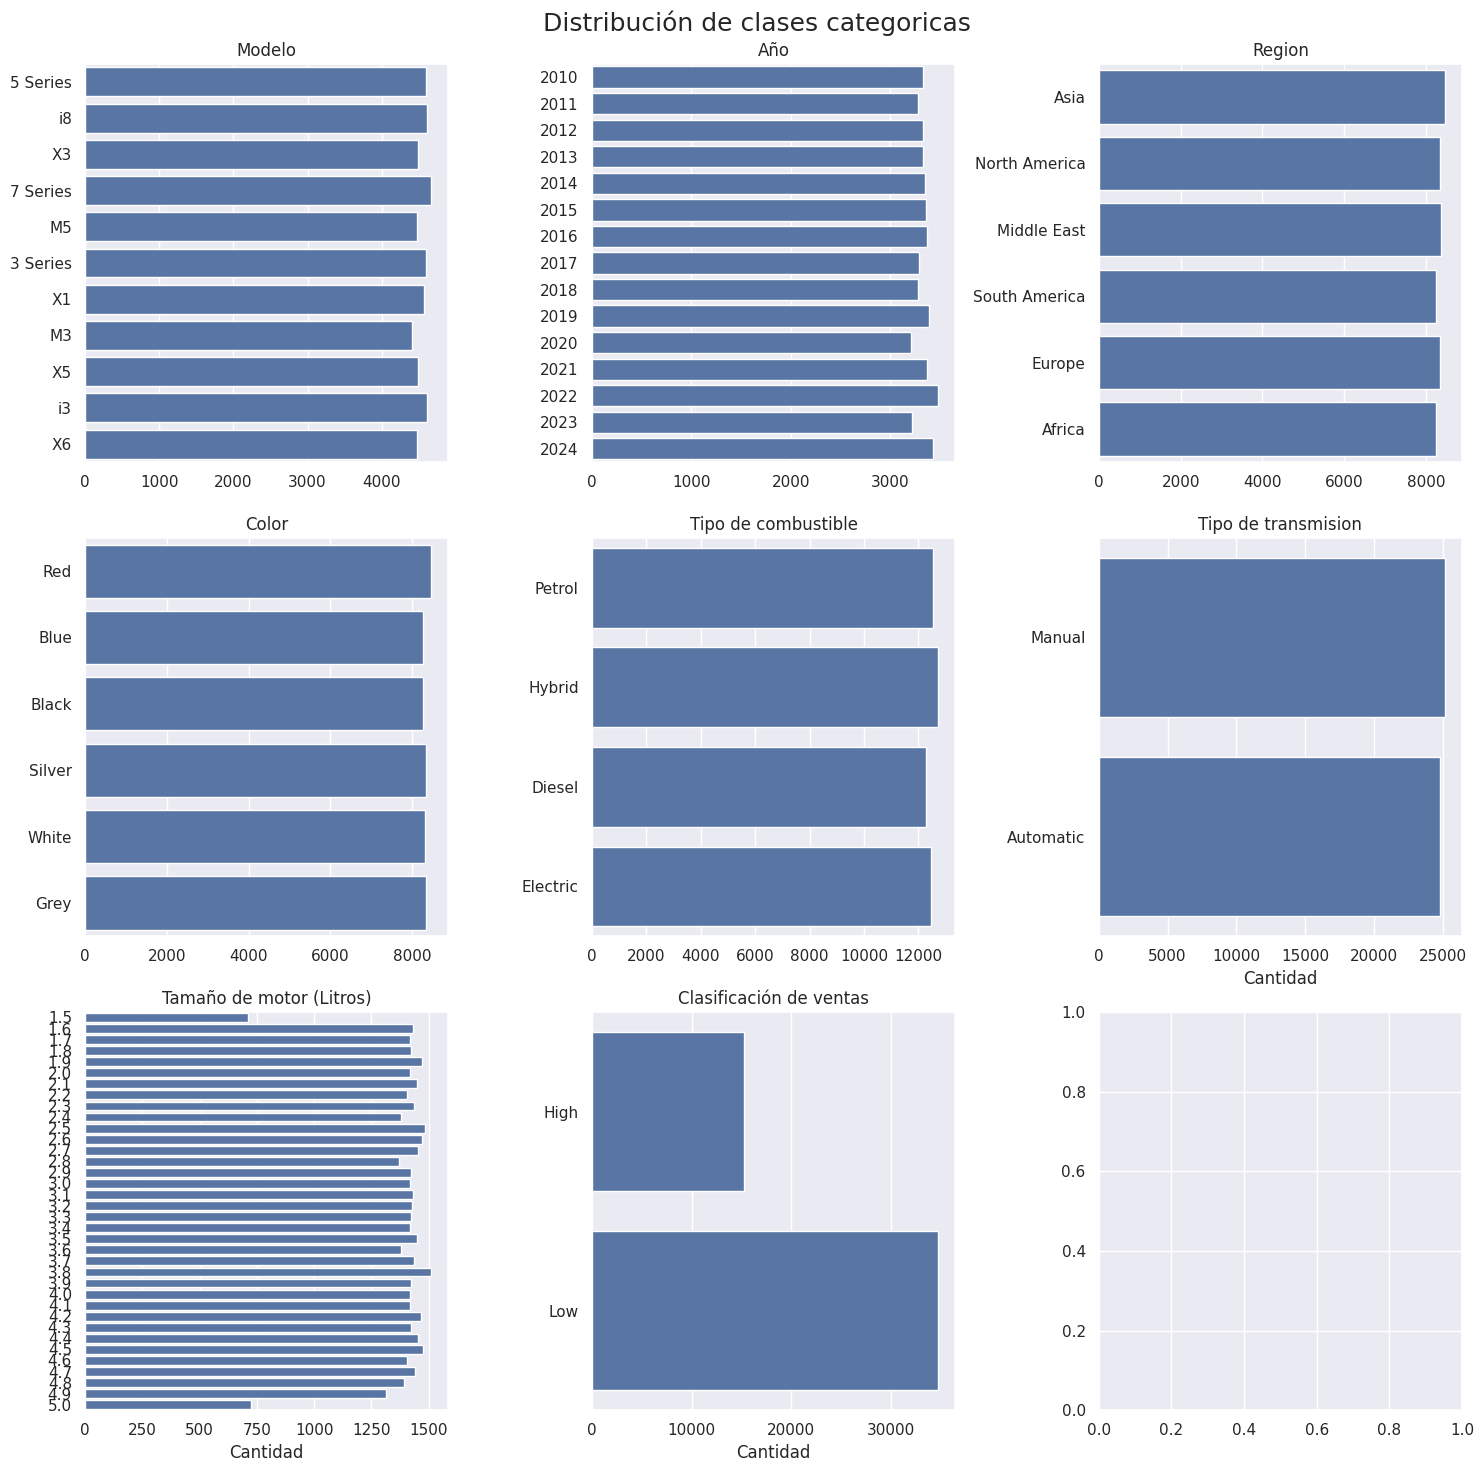

In [6]:
fig, axs = plt.subplots(3,3, figsize=(15,15))
sns.set_theme(style='darkgrid')

fig.suptitle('Distribución de clases categoricas', fontsize=18, x=0.51)

sns.countplot(y='Model', data=data, ax=axs[0,0])

axs[0,0].set_title('Modelo')
axs[0,0].set_ylabel('')
axs[0,0].set_xlabel('')

sns.countplot(y='Year', data=data, ax=axs[0,1])

axs[0,1].set_title('Año')
axs[0,1].set_ylabel('')
axs[0,1].set_xlabel('')

sns.countplot(y='Region', data=data, ax=axs[0,2])

axs[0,2].set_title('Region')
axs[0,2].set_ylabel('')
axs[0,2].set_xlabel('')

sns.countplot(y='Color', data=data, ax=axs[1,0])

axs[1,0].set_title('Color')
axs[1,0].set_ylabel('')
axs[1,0].set_xlabel('')

sns.countplot(y='Fuel_Type', data=data, ax=axs[1,1])

axs[1,1].set_title('Tipo de combustible')
axs[1,1].set_ylabel('')
axs[1,1].set_xlabel('')

sns.countplot(y='Transmission', data=data, ax=axs[1,2])

axs[1,2].set_title('Tipo de transmision')
axs[1,2].set_ylabel('')
axs[1,2].set_xlabel('Cantidad')

sns.countplot(y='Engine_Size_L', data=data, ax=axs[2,0])

axs[2,0].set_title('Tamaño de motor (Litros)')
axs[2,0].set_ylabel('')
axs[2,0].set_xlabel('Cantidad')

sns.countplot(y='Sales_Classification', data=data, ax=axs[2,1])

axs[2,1].set_title('Clasificación de ventas')
axs[2,1].set_ylabel('')
axs[2,1].set_xlabel('Cantidad')

plt.tight_layout()
plt.show()

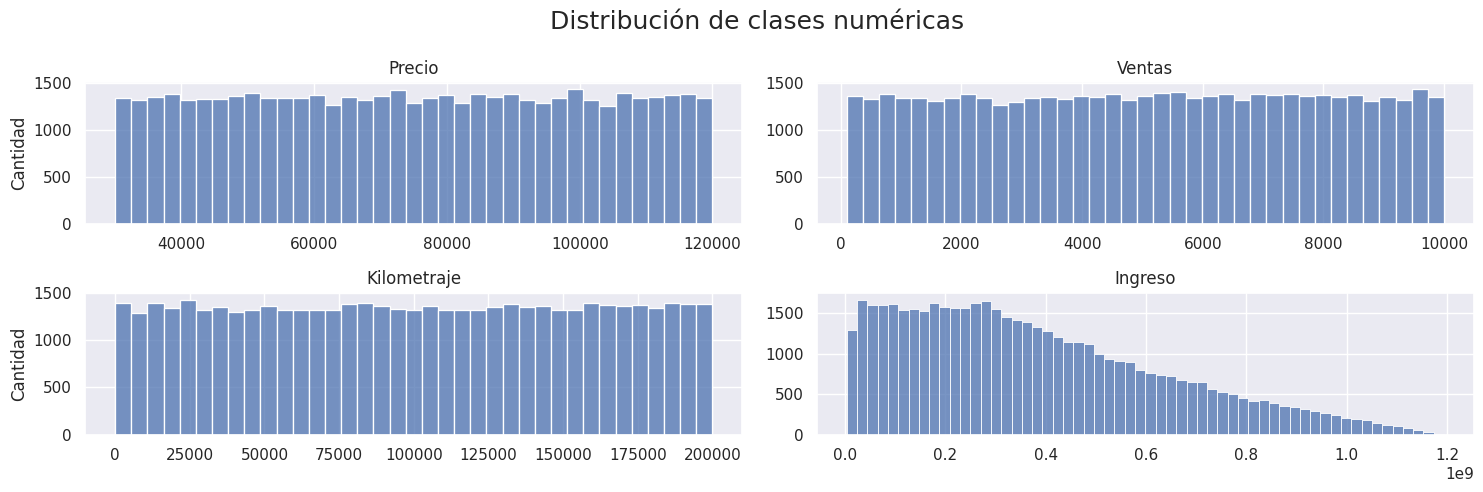

In [5]:
fig, axs = plt.subplots(2,2, figsize=(15,5))
sns.set_theme(style='darkgrid')

fig.suptitle('Distribución de clases numéricas', fontsize=18, x=0.51)

sns.histplot(data=data, x='Price_USD', ax=axs[0,0])

axs[0,0].set_title('Precio')
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('Cantidad')

sns.histplot(data=data, x='Sales_Volume', ax=axs[0,1])

axs[0,1].set_title('Ventas')
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('')

sns.histplot(data=data, x='Mileage_KM', ax=axs[1,0])

axs[1,0].set_title('Kilometraje')
axs[1,0].set_xlabel('')
axs[1,0].set_ylabel('Cantidad')

sns.histplot(data=data, x='total_price_USD', ax=axs[1,1])

axs[1,1].set_title('Ingreso')
axs[1,1].set_xlabel('')
axs[1,1].set_ylabel('')

plt.tight_layout()
plt.show()

#Transformación de datos cualitativos a cuantitativos

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

encode_data = data.copy()
encoder = LabelEncoder()

encode_data['Model'] = encoder.fit_transform(encode_data['Model'])
encode_data['Region'] = encoder.fit_transform(encode_data['Region'])
encode_data['Color'] = encoder.fit_transform(encode_data['Color'])
encode_data['Fuel_Type'] = encoder.fit_transform(encode_data['Fuel_Type'])
encode_data['Transmission'] = encoder.fit_transform(encode_data['Transmission'])
encode_data['Sales_Classification'] = data['Sales_Classification'].replace({'High':1,'Low':0})

encode_data.head()

/tmp/ipython-input-4180447945.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encode_data['Sales_Classification'] = data['Sales_Classification'].replace({'High':1,'Low':0})


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,total_price_USD
0,1,2016,1,3,3,1,3.5,151748,98740,8300,1,819542000
1,10,2013,4,3,2,0,1.6,121671,79219,3428,0,271562732
2,1,2022,4,1,3,0,4.5,10991,113265,6994,0,792175410
3,6,2024,3,1,3,0,1.7,27255,60971,4047,0,246749637
4,2,2020,5,0,0,1,2.1,122131,49898,3080,0,153685840


In [ ]:
encode_data.corr()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,total_price_USD
Model,1.000000,-0.003107,0.000263,-0.008895,0.001258,0.003901,-0.001271,-0.009262,-0.006762,-0.001374,-0.002304,-0.004145
Year,-0.003107,1.000000,0.003098,-0.005910,0.000236,0.005116,-0.001944,0.008741,0.003547,0.001671,0.005391,0.004198
Region,0.000263,0.003098,1.000000,0.007506,-0.001513,0.005953,0.001501,-0.000075,-0.002456,-0.000716,-0.001045,-0.001670
Color,-0.008895,-0.005910,0.007506,1.000000,-0.005043,-0.001299,0.007271,-0.006765,0.001548,0.006089,0.005216,0.005248
Fuel_Type,0.001258,0.000236,-0.001513,-0.005043,1.000000,0.001249,0.003974,-0.007535,-0.003228,-0.004218,-0.001583,-0.004661
Transmission,0.003901,0.005116,0.005953,-0.001299,0.001249,1.000000,0.001357,-0.013476,-0.005230,-0.001487,-0.001647,-0.001985
Engine_Size_L,-0.001271,-0.001944,0.001501,0.007271,0.003974,0.001357,1.000000,-0.004906,0.000146,-0.003942,-0.001796,-0.002094
Mileage_KM,-0.009262,0.008741,-0.000075,-0.006765,-0.007535,-0.013476,-0.004906,1.000000,-0.004238,0.001434,0.006580,-0.000398
Price_USD,-0.006762,0.003547,-0.002456,0.001548,-0.003228,-0.005230,0.000146,-0.004238,1.000000,0.000080,-0.001727,0.503798
Sales_Volume,-0.001374,0.001671,-0.000716,0.006089,-0.004218,-0.001487,-0.003942,0.001434,0.000080,1.000000,0.795238,0.816078


# Preprocesamiento de datos

In [ ]:
from imblearn.over_sampling import SMOTE
X = encode_data.drop(['Sales_Classification'], axis=1)
y = encode_data['Sales_Classification']

scaler = StandardScaler()
X = scaler.fit_transform(X)

smt =  SMOTE()
X, y = smt.fit_resample(X, y)


# Entrenamiento y evaluación de modelos

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=7)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=7)
target_class = ['Low','High']

models = {'KNeighbors':KNeighborsClassifier(), 'Decision Tree':DecisionTreeClassifier(),
          'Random Forest':RandomForestClassifier(), 'Linear SVC':LinearSVC()}

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(f'Modelo: {name}')
  print(classification_report(y_test, y_pred, target_names=target_class))

Modelo: KNeighbors
              precision    recall  f1-score   support

         Low       0.99      0.91      0.95      6948
        High       0.92      0.99      0.95      6954

    accuracy                           0.95     13902
   macro avg       0.95      0.95      0.95     13902
weighted avg       0.95      0.95      0.95     13902

Modelo: Decision Tree
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      6948
        High       1.00      1.00      1.00      6954

    accuracy                           1.00     13902
   macro avg       1.00      1.00      1.00     13902
weighted avg       1.00      1.00      1.00     13902

Modelo: Random Forest
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      6948
        High       1.00      1.00      1.00      6954

    accuracy                           1.00     13902
   macro avg       1.00      1.00      1.00     13902
weighted av

In [ ]:
best_model = models['KNeighbors']
results = pd.DataFrame(cross_validate(best_model, X_test, y_test, cv=StratifiedKFold(n_splits=5), scoring=['precision', 'recall', 'f1', 'accuracy']))
print(results[['test_precision', 'test_recall', 'test_f1', 'test_accuracy']].mean().round(4)*100)

test_precision    90.67
test_recall       98.36
test_f1           94.36
test_accuracy     94.12
dtype: float64


In [ ]:
param_grid = {'n_neighbors':[5,10,15],
              'weights':['uniform','distance'],
              'algorithm':['ball_tree','kd_tree'],
              'leaf_size':[20,30,40],
              'p':[1,2]}



search = GridSearchCV(best_model, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), scoring='f1')
search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'leaf_size': [20, 30, 40], 'n_neighbors': [5, 10, 15],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='f1')

In [ ]:
search.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 20,
 'n_neighbors': 10,
 'p': 1,
 'weights': 'uniform'}

In [ ]:
print(f'F1-Score: {search.best_score_.round(4)*100}%')

F1-Score: 96.76%


In [ ]:
best_model = search.best_estimator_
results = pd.DataFrame(cross_validate(best_model, X_val, y_val, cv=StratifiedKFold(n_splits=5), scoring=['precision', 'recall', 'f1', 'accuracy']))
print(results[['test_precision', 'test_recall', 'test_f1', 'test_accuracy']].mean().round(4)*100)

test_precision    93.42
test_recall       98.54
test_f1           95.91
test_accuracy     95.85
dtype: float64


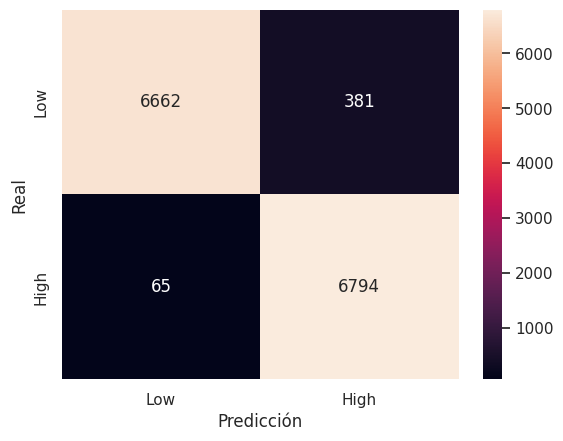

In [ ]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_val)

sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='rocket',
            xticklabels=target_class, yticklabels=target_class)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()